TIP 17 - DEFINITIONS
-----------

In the traditional, procedural, paradigm a program has a state that contains the values of its variables. When functions are called to act on these data according to the task Data are passed back and forth via function calls.

In the OOP paradigm, data and functions are bundled together into “objects” and they come together.

OOP is useful for the same reason that abstraction is useful: for recognizing and exploiting common structure, and trying to avoid repetition (such as performing the same basic functions of opening/closing/minimizing/maximizing windows).

As an easy example consider a Python list, which not only stores data, but also knows how to sort itself, etc.


In [2]:
x = [1, 5, 4]
x.sort()
x

[1, 4, 5]

Note that in the OOP setting functions are often called methods (so ```sort``` is a list method).

TIP 18 - TERMINOLOGY
-----------

A "class definition" is a blueprint for a particular class of objects (e.g., lists, strings or complex numbers)

It gives the kind of data the class stores, the methods it has for acting on these data.

An "object" or "instance" is a realization of the class, created from the blueprint, where each instance has its own unique data.

"Methods" set out in the class definition act on this.

In Python, the data and methods of an object are collectively referred to as attributes, and are given “dotted attribute notation”.

```
object_name.data
object_name.method_name()
```
Above,

```
In [4]: x = [1, 5, 4]

In [5]: x.sort()

In [6]: x.__class__
Out[6]: list
```

x is an object or instance, created from the definition for Python lists, but with its own particular data.

x.sort() and x._ class _ are two attributes of x

TIP 19 - CLASSES
---------

I build a Consumer class containing the following information:

1 A wealth attribute that stores the consumer’s wealth (data)

2 An earn method, where earn(y) increments the consumer’s wealth by y

3 A spend method, where spend(x) either decreases wealth by x or returns an error if insufficient funds exist 

This class defines instance data wealth and three methods: __init__, earn and spend.

Wealth is instance data because each consumer we create (each instance of the Consumer class) will have its own separate wealth data.

Both the earn and spend methods act on the instance data wealth.

The __init__ method is a constructor method.

Whenever we create an instance of the class, this method will be called automatically.

Calling __init__ sets up a “namespace” to hold the instance data.

In [3]:
class Consumer:
    
    def __init__(self, w):
        "Initialize consumer with w dollars of wealth"
        self.wealth = w
        
    def earn(self, y):
        "The consumer earns y dollars" 
        self.wealth += y
        
    def spend(self, x):
        "The consumer spends x dollars if feasible"
        new_wealth = self.wealth - x
        if new_wealth < 0:
            print("Insufficent funds")
        else:
            self.wealth = new_wealth

In [10]:
a = Consumer(1000)
a.earn(100)
a.spend(50)
a.wealth

1050

TIP 20 - THE SOLOW GROWTH MODEL
--------------
The Solow growth model is a neoclassical growth model where the amount of capital stock per capita $k_t$, which evolves according to the rule:
$$k_{t+1}=\frac{szk^{\alpha}_t+(1−d)k_t}{1+n}$$

Where:

$s$  is an exogenously given savings rate

$z$ is a productivity parameter

$\alpha$ is capital’s share of income

$n$ is the population growth rate

$d$ is the depreciation rate

The steady state of the model is the $k$ which solves the equation with 
$$k_{t+1} = k_t = k$$

In [11]:
from __future__ import division
import numpy as np

class Solow:
    r"""
    Implements the Solow growth model with update rule

    .. math::
        k_{t+1} = \frac{s z k^{\alpha}_t}{1 + n}  + k_t \frac{1 + d}{1 + n}
    
    """

    def __init__(self, n, s, d, alpha, z, k):
        """ 
        Solow growth model with Cobb Douglas production function.  All
        parameters are scalars.
        """
        self.n, self.s, self.d, self.alpha, self.z = n, s, d, alpha, z
        self.k = k
        

    def h(self):
        "Evaluate the h function"
        temp = self.s * self.z * self.k**self.alpha + self.k * (1 - self.d)
        return temp / (1 + self.n)

    def update(self):
        "Update the current state (i.e., the capital stock)."
        self.k =  self.h()
        
    def steady_state(self):
         "Compute the steady state value of capital."
         return ((self.s * self.z) / (self.n + self.d))**(1 / (1 - self.alpha))
     
    def generate_sequence(self, t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path


Having put hard work into setting up this class we can write an easy program that uses the class to compute time series from two different initial conditions:

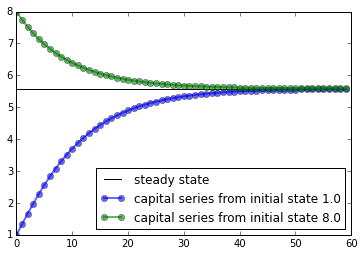

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
baseline_params = 0.05, 0.25, 0.1, 0.3, 2.0, 1.0
s1 = Solow(*baseline_params)  # The 'splat' operator * breaks up the tuple
s2 = Solow(*baseline_params)
s2.k = 8.0  # Reset s2.k to make high capital economy
T = 60
fig, ax = plt.subplots()
# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')
# Plot time series for each economy
for s in s1, s2:
    lb = 'capital series from initial state {}'.format(s.k)
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)

ax.legend(loc='lower right')
plt.show()

TIP 21 - CHAOS
-----------

Let’s look at dynamics in nonlinear systems.

One simple transition rule that can generate complex dynamics is the logistic map:

$$x_{t+1}= rx_t(1−x_t),x_0∈[0,1],r∈[0,4]$$

I want a class which generates a time series from this model:

In [14]:
class Chaos:
    """
    Models the dynamical system with :math:`x_{t+1} = r x_t (1 - x_t)`
    """
    def __init__(self, x0, r):
        """
        Initialize with state x0 and parameter r 
        """
        self.x, self.r = x0, r
        
    def update(self):
        "Apply the map to update state."
        self.x =  self.r * self.x *(1 - self.x)
        
    def generate_sequence(self, n):
        "Generate and return a sequence of length n."
        path = []
        for i in range(n):
            path.append(self.x)
            self.update()
        return path

In [15]:
ch = Chaos(0.1, 4.0) # x0 = 0.1 and r = 0.4

ch.generate_sequence(5)

[0.1, 0.36000000000000004, 0.9216, 0.28901376000000006, 0.8219392261226498]

We can begin to see the repetition set in below for a longer trajectory:

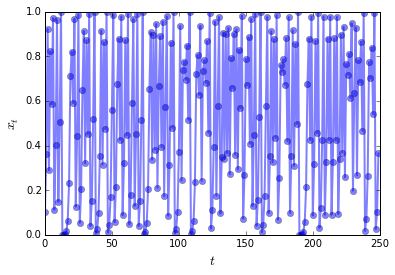

In [17]:
import matplotlib.pyplot as plt

ch = Chaos(0.1, 4.0) 
ts_length = 250

fig, ax = plt.subplots()
ax.set_xlabel(r'$t$', fontsize=14)
ax.set_ylabel(r'$x_t$', fontsize=14)
x = ch.generate_sequence(ts_length)
ax.plot(range(ts_length), x, 'bo-', alpha=0.5, lw=2, label=r'$x_t$')
plt.show()

If we vary $r$ and only consider what happens between $950$ and $1000$ iterations (when cycles have set in) we get the following famous bifurcation diagram:

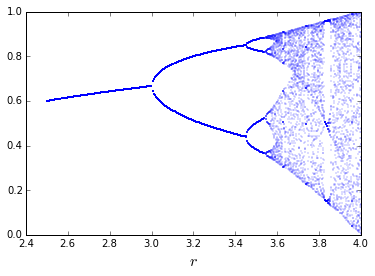

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ch = Chaos(0.1, 4)
r = 2.5
while r < 4:
    ch.r = r
    t = ch.generate_sequence(1000)[950:]
    ax.plot([r] * len(t), t, 'b.', ms=0.6)
    r = r + 0.005

ax.set_xlabel(r'$r$', fontsize=16)
plt.show()

Notice that there is no value of $r$ that leads to a steady state oscillating among three values?!